In [2]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np
import FeaturesExtractor.main as fe


plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120



In [67]:
import os

listeChemin = []

basepath = 'data/'
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        listeChemin.append(basepath + entry)
        
listeChemins = listeChemin[:]

In [77]:
listeChemins[6]


'data/19143 Droit.jpg'

In [68]:
param = {"chemin":"data/19_Droit.jpg",
         "longeur caractéristique du RBF":7,
         "nombre de points d'interêts":100,
        }

###Deux coins identiques
###Image 1
param["chemin"] = listeChemins[6]
[img1,feature1] = fe.getFeatures(param)


### Image 2
param["chemin"] = listeChemins[7]
[img2,feature2] = fe.getFeatures(param)

In [69]:
import cv2

keyPoint1 = []

for coord in feature1:
    x,y = coord
    keyPoint1.append(cv2.KeyPoint(int(x),int(y),1))
    
keyPoint2 = []

for coord in feature2:
    x,y = coord
    keyPoint2.append(cv2.KeyPoint(int(x),int(y),1))


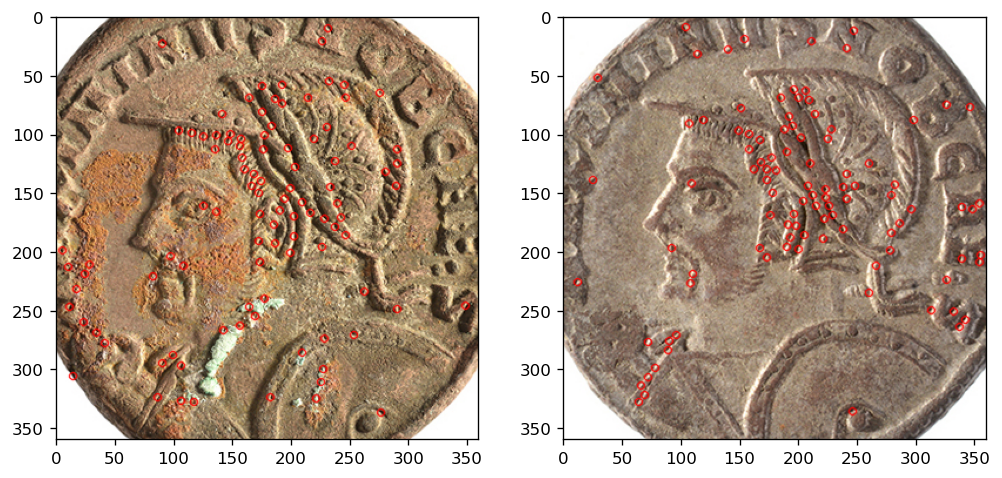

In [70]:
img1F = cv2.drawKeypoints(img1,keyPoint1,None,color=(255,0,0))
img2F = cv2.drawKeypoints(img2,keyPoint2,None,color=(255,0,0))

plt.subplot(1,2,1)
plt.imshow(img1F)
plt.subplot(1,2,2)
plt.imshow(img2F)
plt.show()

# Description d'un aglo de détection et correspondance

## Etape 1 : Détection 

Trouver les PI -> Ici PI du processus gaussiens

## Etape 2 : Description 

On associe une description pour chaque PI, sous forme d'un vecteur qui décrit localement la variation des pixels environnants 

## Etape 3 : Correspondance

Chaque description est comparée pour identifier les PI similaires 

In [71]:
orb = cv2.ORB_create()

keyPoint1,des1 = orb.compute(img1,keyPoint1)
keyPoint2,des2 = orb.compute(img2,keyPoint2)


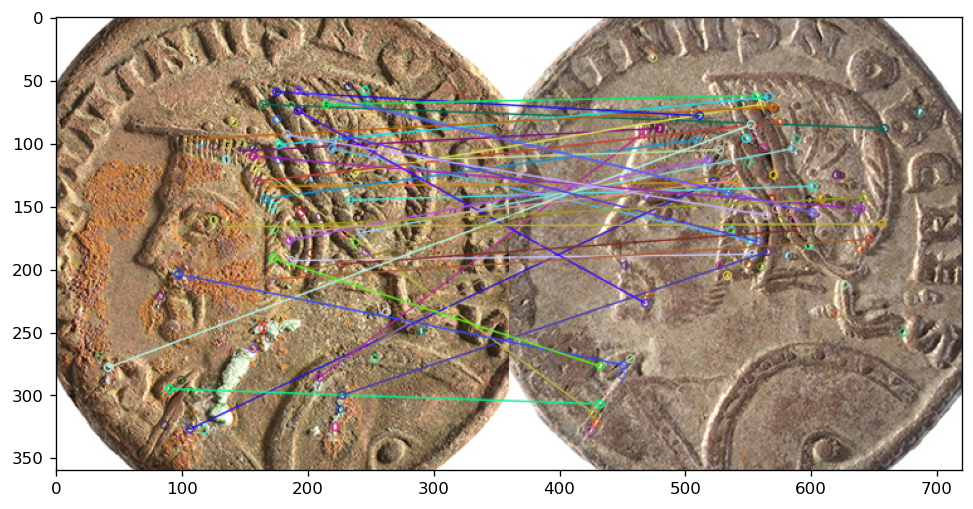

In [72]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

matches = bf.match(des1,des2)

matches = sorted(matches,key=lambda x:x.distance)

img3 = cv2.drawMatches(img1,keyPoint1,img2,keyPoint2,matches,None)
plt.imshow(img3)
plt.show()

In [73]:
src_pts = np.float32([ keyPoint1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ keyPoint2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

In [74]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

MatchesF = np.extract(mask.ravel(),matches)

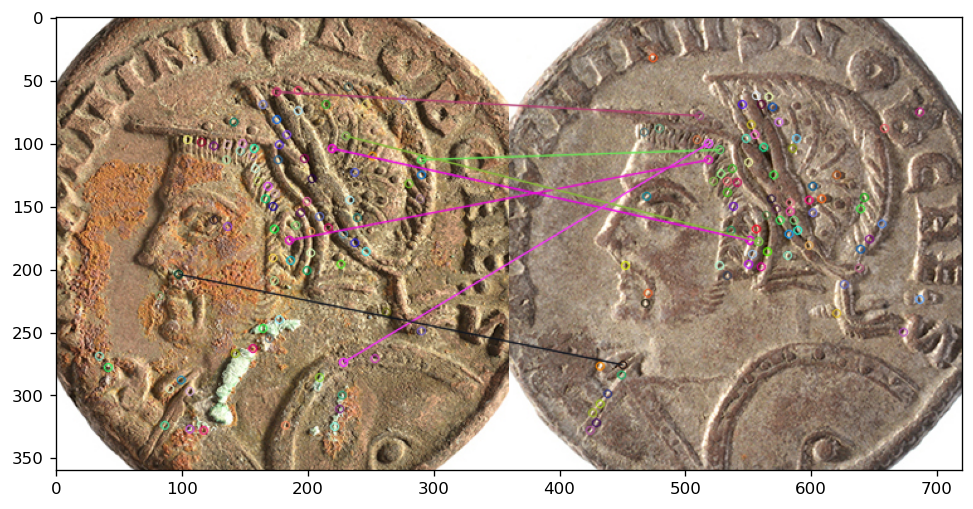

In [75]:
img4 = cv2.drawMatches(img1,keyPoint1,img2,keyPoint2,MatchesF,None)
plt.imshow(img4)
plt.show()

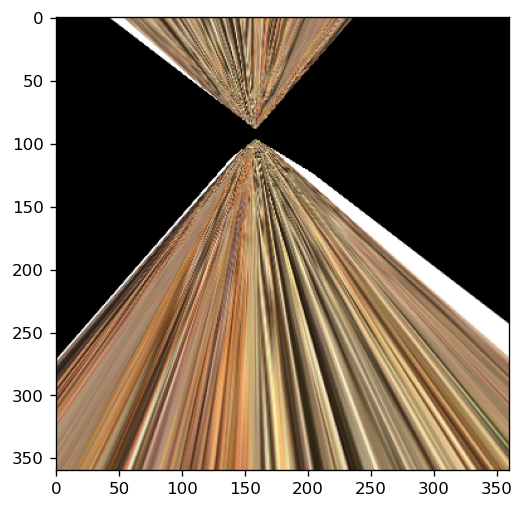

In [76]:
img1Warp = cv2.warpPerspective(img1, M,(360,360))
plt.imshow(img1Warp)
plt.show()

In [33]:
n = np.shape(MatchesF)[0]
print(n)

6


In [34]:
src_pts = np.float32([ keyPoint1[m.queryIdx].pt for m in MatchesF ]).reshape(-1,2)
dst_pts = np.float32([ keyPoint2[m.trainIdx].pt for m in MatchesF ]).reshape(-1,2)

In [27]:
from scipy.spatial import procrustes
a,b,m=procrustes(src_pts,dst_pts)

In [28]:
print(m)

0.0013422125481461714


In [29]:
print(n)

12


In [30]:
d = 1.0/n + np.log(m)
print(d)

-6.53010253801132


In [31]:
from FeatureMatching.distance import getDistance,getFilteredMatch

kp1,kp2,match = getFilteredMatch(img1,feature1,img2,feature2)

In [32]:
d = getDistance(kp1,kp2,match)

In [33]:
print(d)

1.7198974619886807
